# **Project: Laptop prices (Linear Regression)**

The goal of this analysis is to identify the features that most affect the price of a laptop using linear regression. 

The dataset being used contains a set of specifications plus the price of each laptop device, and was downloaded from Kaggle (https://www.kaggle.com/datasets/ironwolf437/laptop-price-dataset/data) under an Apache 2.0 license.

### **Importing key libraries.**

In [1]:
import pandas as pd 
import numpy as np

### **Loading and previewing the data.**

In [2]:
df = pd.read_csv("laptop.csv")

#Previewing the data
print(df.head())

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

We want to know how many different laptops are included in the dataset, as well as the different features that are included.

In [3]:
print(f"There are {len(df)} different laptops in the dataset.")
print(df.columns)

There are 1275 different laptops in the dataset.
Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')


We ask for the summary statistics for this data set.

In [4]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


Observe that the numerical features are spread across different scales (e.g. the *Inches* column has a mean of ~15 and the *Weight (kg)* column has a mean of ~2). We will scale the data later on to avoid the features with larger values being given more weighting.

### **Cleaning the data.**

We check whether any of the columns in our dataset contain missing values.

In [5]:
df.isna().any()

Company                False
Product                False
TypeName               False
Inches                 False
ScreenResolution       False
CPU_Company            False
CPU_Type               False
CPU_Frequency (GHz)    False
RAM (GB)               False
Memory                 False
GPU_Company            False
GPU_Type               False
OpSys                  False
Weight (kg)            False
Price (Euro)           False
dtype: bool

There are no missing values in our dataset.

We check for duplicate rows.

In [6]:
print(df.duplicated().sum())

0


There are no duplicate rows.

### **Exploring the data.**

We want to investigate which features of the Laptop correlate to its price.

We will firstly scale the numerical data to avoid features with larger values being given more weighting.

In [7]:
from sklearn.preprocessing import MinMaxScaler

#Selecting numeric columns (ignore categorical columns)
numeric_df = df.select_dtypes(include = [float, int])

scaler = MinMaxScaler()
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns = numeric_df.columns) #scaling the numeric columns

df_scaled = df.copy()  #Making a copy of the original dataframe
df_scaled[numeric_df.columns] = numeric_df_scaled  # Replacing numeric columns with scaled values


We compute the Pearson correlation coefficient to assess whether there is a linear relationship between any of the numerical features and the price.

In [8]:
#Computing correlation on numeric data
correlation = numeric_df_scaled.corr(method = "pearson")
print(correlation)

                       Inches  CPU_Frequency (GHz)  RAM (GB)  Weight (kg)  \
Inches               1.000000             0.305037  0.241078     0.826638   
CPU_Frequency (GHz)  0.305037             1.000000  0.366254     0.318649   
RAM (GB)             0.241078             0.366254  1.000000     0.389370   
Weight (kg)          0.826638             0.318649  0.389370     1.000000   
Price (Euro)         0.066608             0.428847  0.740287     0.211883   

                     Price (Euro)  
Inches                   0.066608  
CPU_Frequency (GHz)      0.428847  
RAM (GB)                 0.740287  
Weight (kg)              0.211883  
Price (Euro)             1.000000  


From the table of correlation coefficients, we see that:
- There is a moderately positive linear relationship between Price (Euro) and CPU_Frequency (GHz)
- There is a strong positive linear relationship between Price (Euro) and RAM (GB).

### **Visualising the data.**

We will create scatter plots for the following variables to visualise these relationships:
- Price (Euro) and CPU_Frequency (GHz)
- Price (Euro) and RAM (GB)

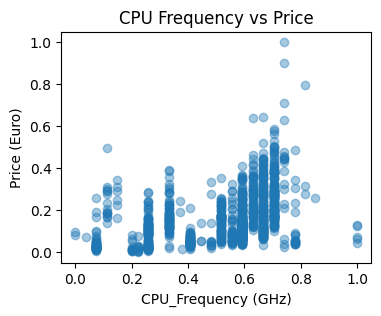

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(4, 3))

plt.scatter(df_scaled["CPU_Frequency (GHz)"], df_scaled["Price (Euro)"], alpha = 0.4)
plt.xlabel("CPU_Frequency (GHz)")
plt.ylabel("Price (Euro)")
plt.title("CPU Frequency vs Price")
plt.show()

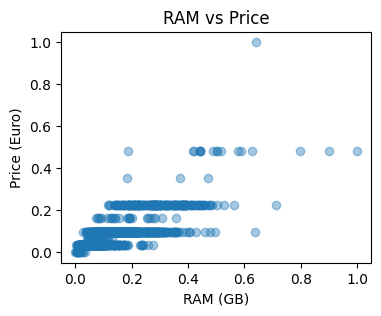

In [10]:
plt.figure(figsize=(4, 3))

plt.scatter(df_scaled["Price (Euro)"], df_scaled["RAM (GB)"], alpha = 0.4)
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euro)")
plt.title("RAM vs Price")
plt.show()

### **Selecting the data.**

We will create a list of the features (CPU Frequency and RAM) that have the strongest correlations with the price, since this is the data that will be inserted into our Linear Regression model. 

In [11]:
features = df_scaled[["CPU_Frequency (GHz)", "RAM (GB)"]]

### **Training and testing sets.**

We need to break our data into a training set (which trains the model) and a test set (which checks whether the model is performing well). We can use scikit-learn's *train_test_split* function to do so. We will train the model on 80% of the data, and use the other 20% to test the model.


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, df_scaled["Price (Euro)"], test_size = 0.2, random_state = 42)

### **Creating and training the model.**

We will use the *linear_model* module from scikit-learn, fitting and training the module on our training data.

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### **Evaluating the model.**

* We will compute the coefficient of determination (R^2) for our model (on both the training and testing set).
  * This coefficient ranges from 0 to 1, and is a measure of how well a model fits a data set, where 1 is the best possible value.
* We will also compute the Mean Absolute Error (MAE).
  * The MAE is the average absolute difference between predicted and actual values.

In [14]:
print("Training R^2:", model.score(X_train,y_train))

from sklearn.metrics import mean_absolute_error

print("Training MAE:", mean_absolute_error(y_train, model.predict(X_train)))

Training R^2: 0.5656605655696574
Training MAE: 0.05703216617755663


In [15]:
print("Testing R^2:", model.score(X_test, y_test))
print("Testing MAE:", mean_absolute_error(y_test, model.predict(X_test)))

Testing R^2: 0.6182273347334168
Testing MAE: 0.05583661018793489


The R^2 coefficient suggests the model is a moderate fit for both the training data and the testing data. 

The MAE score of around ~0.05 on both sets suggests there is a very low error rate in the model's predictions.

We can also use the model to predict prices from our testing data, and then compare these prices to the actual prices.

In [16]:
y_predicted = model.predict(X_test)

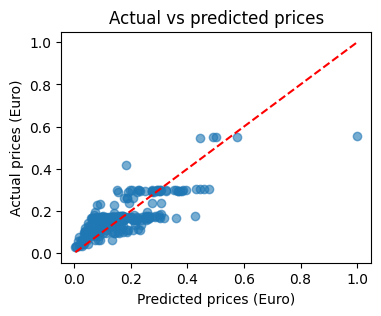

In [17]:
plt.figure(figsize = (4, 3))

plt.scatter(y_test,y_predicted, alpha = 0.6)
plt.xlabel("Predicted prices (Euro)")
plt.ylabel("Actual prices (Euro)")

plt.title("Actual vs predicted prices")

x_range = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_range, x_range, color = 'red', linestyle = '--', label = "y = x Line")

plt.show()

The plot also displays the *y = x* line. For a perfect linear regression model, the data would be plotted along this line. We observe that *some* of the data is plotted along this line, meaning that the model correctly predicted some of the prices. However, there are some large deviations from the line meaning that the model's predictions aren't entirely accurate. Furthermore, the deviation of the points from the line increase as the prices increase (i.e. the model exhibits heteroscedasticity). 

### **Improvements (company)**

We want to investigate whether adding the company producing the laptop improves the model.
Since the company is a categorical variable, we want to convert it into a format suitable for analysis. 

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

features_with_company = df_scaled[["CPU_Frequency (GHz)", "RAM (GB)", "Company"]]

# Resplitting the dataset into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(features_with_company, df_scaled["Price (Euro)"], test_size = 0.2, random_state = 42)

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown = "ignore"), ["Company"]),  # One-hot encoding the "Company" column
    ("num", 'passthrough', ["CPU_Frequency (GHz)", "RAM (GB)"])  # Keeping numeric columns as they are
])

model_new = Pipeline([
    ("preprocessor", preprocessor),  # Applying OneHotEncoding for the "Company" column
    ("regressor", LinearRegression())  # Linear regression model
])

# Fitting the model to the data
model_new.fit(X_train_new, y_train_new)

# Predicting the values using the test set
y_predicted_new = model_new.predict(X_test_new)

Now we will evaluate the new model, again using the R^2 coefficient and the MAE score.

In [19]:
print("New model R^2 (training):", model_new.score(X_train_new,y_train_new))
print("Old model R^2 (training):", model.score(X_train,y_train))

New model R^2 (training): 0.6102999298065024
Old model R^2 (training): 0.5656605655696574


We will write a short function to compute the percentage difference in two values.

In [20]:
def prcnt_change(old: float, new: float) -> str:  
    """Computes percentage difference and returns as a formatted string."""
    prcnt = 100 * (new - old) / old
    return f"{round(prcnt, 2)}%"

In [21]:
print("The model's performance on the training set has improved by", prcnt_change(model.score(X_train,y_train), model_new.score(X_train_new,y_train_new)))

The model's performance on the training set has improved by 7.89%


In [22]:
print("New model R^2 (testing):", model_new.score(X_test_new,y_test_new))
print("Old model R^2 (testing):", model.score(X_test,y_test))

print("The model's performance on the testing set has improved by", prcnt_change(model.score(X_test,y_test), model_new.score(X_test_new,y_test_new)))

New model R^2 (testing): 0.6569038519797799
Old model R^2 (testing): 0.6182273347334168
The model's performance on the testing set has improved by 6.26%


### **Improvements (memory)**

We want to investigate whether adding the Memory column to the list of training features improves the model's performance.

Let's remind ourselves of the values in the Memory column.

In [23]:
print(df.Memory.unique())

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


Observe that there are 4 storage types: **SSD**, **HDD**, **Hybrid** and **Flash Storage**. 

An **SSD** (Solid-State Drive) is a fast and energy-efficient storage device with no moving parts, which makes it ideal for speed and reliability. A **HDD** (Hard Disk Drive) uses spinning disks to store data, offering larger storage capacity at a lower cost but with slower performance. 

Hybrid drives are a combination of both technologies, using a small SSD for frequently accessed data while relying on an HDD for bulk storage.

We will class a Hybrid drive as a HDD as it still has moving parts and isn't as fast as an SSD.

We will class Flash Storage as an SSD as they are often used interchangeably for marketing purposes.

**Memory conversion**.

We want to write a function that splits a value in the Memory column into four parts:
* Primary storage capacity (int)
* Primary SSD (0/1)
* Secondary storage capacity (int)
* Secondary SSD (0/1)
  

In [24]:
import re

def process_memory(memory):
    # Clean input
    memory = memory.strip().upper()  # Remove extra spaces & make case-insensitive
    
    # Split into parts (handle '+' if multiple storage devices exist)
    parts = [x.strip() for x in memory.split("+")]

    primary_storage = 0
    secondary_storage = 0
    primary_ssd = 0
    secondary_ssd = 0
    
    for i, part in enumerate(parts):
        # Extract storage size (handles GB and TB)
        match = re.search(r'(\d+)(TB|GB)', part)
        if not match:
            print(f"Skipping invalid entry: {part}")  # Debugging step
            continue  # Skip if format is incorrect
        
        size, unit = match.groups()
        size_in_gb = int(size) * (1000 if unit == "TB" else 1)  # Convert TB to GB

        # Determine if SSD
        is_ssd = 1 if "SSD" in part or "FLASH STORAGE" in part else 0

        # Assign to primary or secondary storage
        if i == 0:
            primary_storage, primary_ssd = size_in_gb, is_ssd
        else:
            secondary_storage, secondary_ssd = size_in_gb, is_ssd

    return pd.Series([primary_storage, secondary_storage, primary_ssd, secondary_ssd], 
                     index = ["Primary_Storage", "Secondary_Storage", "Primary_SSD", "Secondary_SSD"])

Now that we have our conversion function, we can apply it to the Memory column.

In [25]:
df = df.join(df["Memory"].apply(lambda x: pd.Series(process_memory(str(x)))))
df.drop(columns = ["Memory"], inplace=True)  #Dropping text column

Before training the new model, we want to rescale the data as we've added new numerical columns.

In [26]:
#Selecting numeric columns (ignore categorical columns)
numeric_df = df.select_dtypes(include = [float, int])

scaler = MinMaxScaler()
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns = numeric_df.columns) #scaling the numeric columns

df_scaled = df.copy()  #Making a copy of the original dataframe
df_scaled[numeric_df.columns] = numeric_df_scaled  #Replacing numeric columns with scaled values

Now we'll select the features we want to train our new model on.

In [27]:
features_with_memory = df_scaled[["CPU_Frequency (GHz)", "RAM (GB)", "Company", "Primary_Storage", "Primary_SSD", "Secondary_Storage", "Secondary_SSD" ]] #Adding new Memory columns

Now we can train a new model.

In [28]:
# Resplitting the dataset into training and testing sets
X_train_memory, X_test_memory, y_train_memory, y_test_memory = train_test_split(features_with_memory, df_scaled["Price (Euro)"], test_size = 0.2, random_state = 42)

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown = "ignore"), ["Company"]),  # One-hot encoding the "Company" column
    ("num", 'passthrough', ["CPU_Frequency (GHz)", "RAM (GB)", "Primary_Storage", "Primary_SSD", "Secondary_Storage", "Secondary_SSD"])  # Keeping numeric columns as they are
])

model_with_memory = Pipeline([
    ("preprocessor", preprocessor),  # Applying OneHotEncoding for the "Company" column
    ("regressor", LinearRegression())  # Linear regression model
])

# Fitting the model to the data
model_with_memory.fit(X_train_memory, y_train_memory)

# Predicting the values using the test set
y_predicted_memory = model_with_memory.predict(X_test_memory)

Now we will evaluate the new model.

In [29]:
print("R^2 score (model with memory, training):", model_with_memory.score(X_train_memory,y_train_memory))
print("R^2 score (previous model, training):", model_new.score(X_train_new,y_train_new))

print("The model's R^2 score on the training set has improved by", prcnt_change(model_new.score(X_train_new,y_train_new),model_with_memory.score(X_train_memory,y_train_memory)))


R^2 score (model with memory, training): 0.6499382281478613
R^2 score (previous model, training): 0.6102999298065024
The model's R^2 score on the training set has improved by 6.49%


In [30]:
print("R^2 score (model with memory, testing):", model_with_memory.score(X_test_memory,y_test_memory))
print("R^2 score (previous model, testing):", model_new.score(X_test_new,y_test_new))

print("The model's performance on the testing set has improved by", prcnt_change(model_new.score(X_test_new,y_test_new),model_with_memory.score(X_test_memory,y_test_memory)))

R^2 score (model with memory, testing): 0.7063635681211786
R^2 score (previous model, testing): 0.6569038519797799
The model's performance on the testing set has improved by 7.53%


We will also compute the MAE score of the new model.

In [31]:
print("Training MAE (model with memory, training):", mean_absolute_error(y_train_memory, model_with_memory.predict(X_train_memory)))

print("Testing MAE (model with memory, testing):", mean_absolute_error(y_test_memory, model_with_memory.predict(X_test_memory)))

Training MAE (model with memory, training): 0.050929584696365535
Testing MAE (model with memory, testing): 0.049043274181472085


The MAE score is low for both training and testing sets for this model. 

Observe that the testing MAE is slightly less than the training MAE suggesting that the model generalises well and is not overfitting.

### **Summary.** ###

In this project, we aimed to analyse laptop prices using linear regression to determine which features have the most significant impact on price. 

We started by loading and cleaning the dataset, ensuring that it had no missing values.

Our initial model included only the features **CPU Frequency (GHz)** and **RAM (GB)**; as they showed strong correlations with price. The model performed moderately well, but there was room for improvement.

To improve the model's performance, we first incorporated the **Company** variable using one-hot encoding. This improved the model’s performance, indicating that the manufacturer has some influence on laptop prices.

We further refined our model by adding memory specifications, including **Primary Storage, Secondary Storage**, and **SSD indicators**. This addition led to a notable improvement in model accuracy, both on the training and testing sets.

### **Future Project.**

* Build a web app where users can input laptop specs and receive a price prediction.